In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("F9.xlsx")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X=df[["Width","Thick","Retention","Spec","GRADE"]]
y=df["TE"]
l1=["Width","Thick","Retention","Spec","GRADE"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [7]:
#model=RandomForestClassifier()
#model=xgb.XGBClassifier()
#model=LogisticRegression()
model=GradientBoostingClassifier()
#model=HistGradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [8]:
y_pred=model.predict(X_test)
y1_pred=model.predict(X_train)

In [9]:
from sklearn import metrics

In [10]:
print(metrics.mean_squared_error(y_test,y_pred))

0.3276525563496427


In [11]:
print(metrics.mean_squared_error(y_train,y1_pred))

0.32281366569956776


In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.23      0.34      3342
           1       0.67      0.93      0.78      5753

    accuracy                           0.67      9095
   macro avg       0.67      0.58      0.56      9095
weighted avg       0.67      0.67      0.62      9095



In [14]:
import shap

In [22]:
explainer=shap.Explainer(model)
shap_values=explainer(X_test)

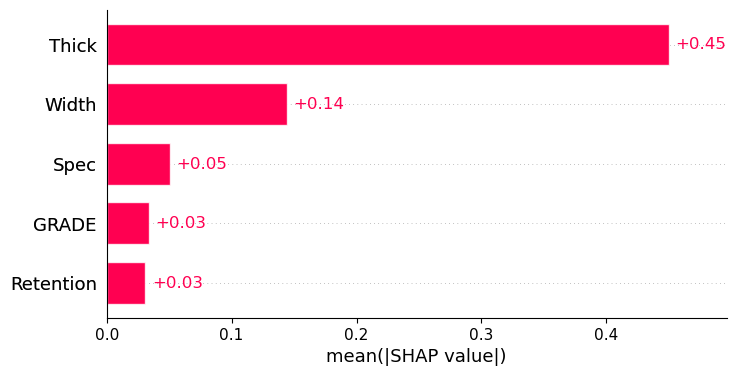

In [23]:
shap.plots.bar(shap_values)

In [17]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 755, 2587],
       [ 393, 5360]], dtype=int64)

In [18]:
metrics.f1_score(y_test,y_pred)

0.7824817518248175

In [19]:
metrics.f1_score(y_train,y1_pred)

0.7850666246156273

In [20]:
print(model.feature_importances_)

[0.16980735 0.68471935 0.03997252 0.02509737 0.08040341]


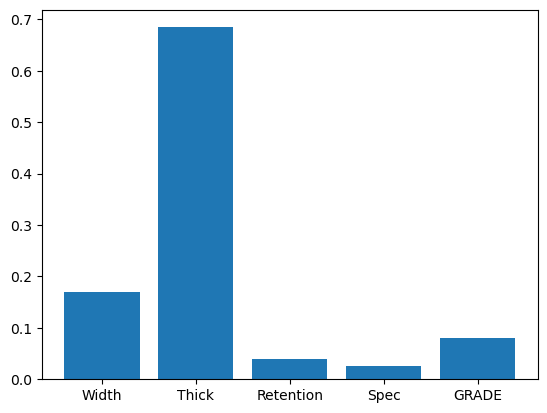

In [21]:
plt.bar(l1,model.feature_importances_)
plt.show()